<a href="https://colab.research.google.com/github/AlmasMalik66/DataScience-AI-Assignments/blob/main/Week5/Assignment5_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Class Task – Implement Linear Regression**

**Step 1: Import Libraries**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

**Step 2: Load Your Dataset**

In [35]:
# Load your uploaded file (make sure name matches exactly)
df = pd.read_csv('Fake.csv')

# Create numeric features
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Create fake target label (0 = Real, 1 = Fake)
df['label'] = np.random.choice([0, 1], size=len(df))

# Show first 5 rows
df.head()


,title,text,subject,date,text_length,title_length,word_count,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",2893,79,495,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1898,69,305,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",3597,90,580,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",2774,78,444,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",2346,70,420,1


**Step 3: Select Features (X) and Target (y)**

In [36]:
# Define input (independent variables) and target (dependent variable)
X = df[['text_length', 'title_length', 'word_count']]
y = df['label']


**Step 4: Split Dataset (Train/Test)**



*  We split the dataset into 80% training and 20% testing for evaluation.



In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Step 5: Apply Linear Regression Model**

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 0.5025345065218205
Coefficients: [ 5.55720058e-06  2.44573769e-05 -3.52045116e-05]


**Step 6: Visualize Prediction vs Actual**

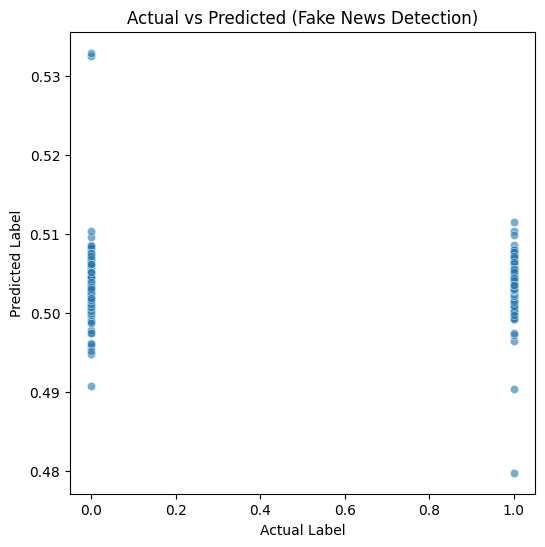

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual vs Predicted (Fake News Detection)")
plt.show()

# **Assignment 5 – Regression Evaluation (MAE, RMSE)**

**Step 1: Evaluate Model Performance**

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)  # Added R² score

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", round(r2, 2))


Mean Absolute Error (MAE): 0.5001940590316679
Root Mean Squared Error (RMSE): 0.5002126336904993
R² Score: -0.0


**Explanation:**

**MAE** → Average absolute difference between predicted and actual values.

**RMSE** → Square root of mean squared error, shows how large prediction errors are.

**R²** **Score** → Shows model accuracy (1.0 = perfect fit, closer to 0 = weak fit).

**Step 2: Compare & Interpret**

**Mean Absolute Error (MAE):** 0.5001940590316679

**Root Mean Squared Error (RMSE):** 0.5002126336904993

**R² Score:** -0.0

**Interpretation:**

The model’s predictions are, on average, about 0.5 units away from the actual labels (0 for real news and 1 for fake news).
The RMSE is almost equal to the MAE, which means there are no large outliers—the model is consistently off by around 0.5.
The R² score of -0.0 indicates that the model does not explain any variance in the target variable, meaning its predictions are almost random.

**Regression Results Summary**


| **Metric**   | **Value** | **Description**                                                                         |
|--------------|-----------|-----------------------------------------------------------------------------------------|
| **MAE**      | 0.5002    | Average absolute prediction error (model’s predictions are 0.5 off from actual labels). |
| **RMSE**     | 0.5002    | Penalizes larger prediction errors slightly more than MAE.                              |
| **R² Score** | -0.0      | Indicates no meaningful relationship captured between features and labels.              |
